# Twitter API

## 1. Business Understanding

### 1.1 Overview

### 1.2 Problem Statement

### 1.3 Business Objectives

### 1.4 Business Success Criteria

## 2. Data Understanding

### 2.1 Collecting the Data

In [117]:
#Importing the libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import snscrape.modules.twitter as sntwitter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import warnings
import re 
import string
import wordninja 
from textblob import Word
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
# maxTweets = 20000
# # Creating list to append tweet data to
# tweets_list2 = []
# # Using TwitterSearchScraper to scrape data and append tweets to list
# for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Safaricom_Care since:2016-01-01 until:2022-12-15').get_items()):
#     if i>maxTweets:
#         break
#     tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
# # Creating a dataframe from the tweets list above
# tweets_df = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
# tweets_df.to_csv("tweets.csv", index = False)

In [58]:
#Loading the data set
tweets_df = pd.read_csv('1MillTweets.csv')
tweets_df.head()

,Datetime,Tweet Id,Text,Username,LikeCount
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister,0
1,2022-12-14 23:41:18+00:00,1603173313052037120,"@ital_john Hello John, the deadline was Octobe...",Safaricom_Care,0
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi,0
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_,2
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn,0


### 2.2 Describing the Data

#### 2.2.1 Description of the columns in the data set:

> * Datetime - This refers to the date of the tweet

> * Tweet Id - This refers to the unique id of the tweet

> * Text - This refers to the actual text in the tweet

> * Username - This refers to the name of the user who commented

> * Like Count -This refers to the number of likes a tweet receives

#### 2.2.2 Description of the size, statistics and data type

In [59]:
# creating a class that we will use to describe the data

class describing_the_data(object):
      def __init__(self, df):
        self.info = df.info
        self.shape = df.shape
        self.describe = df.describe()
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()

In [60]:
#Instantiating the class
data_description = describing_the_data(tweets_df)

In [61]:
# describe the data type of the columns
data_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Datetime   1000001 non-null  object
 1   Tweet Id   1000001 non-null  int64 
 2   Text       1000001 non-null  object
 3   Username   1000001 non-null  object
 4   LikeCount  1000001 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 38.1+ MB


In [62]:
#shape of the data
data_description.shape

(1000001, 5)

In [63]:
#descriptive statistics of the data
data_description.describe

,Tweet Id,LikeCount
count,1.000001e+06,1.000001e+06
mean,1.342273e+18,7.958292e-01
std,1.550978e+17,2.739744e+01
min,1.055776e+18,0.000000e+00
25%,1.226837e+18,0.000000e+00
50%,1.322460e+18,0.000000e+00
75%,1.475853e+18,0.000000e+00
max,1.603175e+18,1.028200e+04


In [64]:
#checking for duplicates
data_description.duplicates

0

In [65]:
#checking for missing values
data_description.missing

Datetime     0
Tweet Id     0
Text         0
Username     0
LikeCount    0
dtype: int64

In [66]:
# pd.options.display.max_columns = 27

# import itertools
# pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
#     'Safaricom_Care since:2016-01-01 until:2022-12-15').get_items(), 2))


## 3. Data Preparation

### 3.1 Data Cleaning

In [67]:
#Removing Tweets by Safaricom in order to have tweets from their customers only
tweets_df = tweets_df[tweets_df['Username'] != 'Safaricom_Care']

In [68]:
#Instantiating the class
data_description_2 = describing_the_data(tweets_df)

In [69]:
data_description_2.shape

(740364, 5)

In [100]:
# Defining functions to clean data
def lower_case(tweet):
    tweet = tweet.lower() 
    return tweet

# def tokenization(tweet):
#     tweet = tweet.split() 

# def 

def remove_links(tweet):
    tweet = re.sub(r"https\S+"," ",tweet) #removes weblinks
    tweet = re.sub(r"bit.ly/\S+", " ",tweet) #removes weblinks
    return tweet

def remove_user(tweet):
    tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',str(tweet)) #removes @user information
    tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',str(tweet))#removes @user information
    return tweet

    # tweet = re.sub("(sxsw)"," ",tweet)
    # tweet = re.sub("(link)"," ",tweet)
# def remove_user(tweet):
#     tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',tweet) #removes @user information
#     tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',tweet) #removes @user information
#     # tweet = re.sub("(sxsw)"," ",tweet)
#     # tweet = re.sub("(link)"," ",tweet)
   
def remove_hashtags(tweet):
    tweeet = re.sub('(#[a-z]+[a-z0-9-_]+)', '',tweet) #removes the hashtags
    return tweet
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

# def remove_stopwords(tweet):
#     stop_words = stopwords.words('english')
#     new_stopwords = ["dm", "check", "kindly", "please", "na" , "ni", "get" , "ya", "hello", "still", "need", "cant", "help", 
#                  "even","hey", "like", "issue", "whats", "hii", "since", "hi", "kwa", "using", "dont", "assist", "im", "know", 
#                  "people", "someone", "thanks", "thank", "waiting", "today", "ive", "want", "us", "use", "ama", "without", 
#                  "trying", "guys", "happening"]
#     stop_words.extend(new_stopwords)
#     tweet = tweet.join(word for word in tweet.split () if word not in (stop_words))
#     return tweet

def basic_clean(tweet):
    """Returns cleaned data, remove punctuation and numbers"""
    tweet = lower_case(tweet)
#     tweet = tokenization(tweet)
    tweet = remove_user(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = deEmojify(tweet)
#     tweet = remove_stopwords(tweet)
    tweet = re.sub('['+ string.punctuation+ ']+', '',tweet) # Removes punctuation
    tweet = re.sub('([0-9]+)'," ",tweet) # Removes numbers
    return tweet


In [101]:
#creating a new column with the clean tweets
clean_data=[]
for i in tweets_df["Text"]:
    clean_data.append(basic_clean(i))

tweets_df['Clean_Tweets']=clean_data
    

In [102]:
tweets_df.head()

,Datetime,Tweet Id,Text,Username,LikeCount,Clean_Tweets
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister,0,ditto
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi,0,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_,2,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn,0,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,1603162972456640517,@enockmogaka7 @SafaricomPLC @Safaricom_Care Th...,cellestialtech,0,the man is dead you buggers still holding ...


In [104]:
df = tweets_df[['Datetime','Tweet Id', 'Username', 'Clean_Tweets']]
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,the man is dead you buggers still holding ...


In [105]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740364 entries, 0 to 1000000
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Datetime      740364 non-null  datetime64[ns, UTC]
 1   Tweet Id      740364 non-null  int64              
 2   Username      740364 non-null  object             
 3   Clean_Tweets  740364 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 28.2+ MB


In [106]:
df["hour"] = df["Datetime"].apply(lambda x: x.hour)
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,i can see you have started and clearly thi...,23
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,we demand you issue a statement concerning ...,23
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,hey th december is my birthday i can see it...,23
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,the man is dead you buggers still holding ...,23


In [107]:
def get_time(hour):
    if hour >=6 and hour < 12:
         return 'Morning'
    if hour > 12 and hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [108]:
df['Time_of_Day'] = df['hour'].apply(get_time)
df['Time_of_Day'].value_counts()

Morning      290148
Evening      226615
Afternoon    223601
Name: Time_of_Day, dtype: int64

In [198]:
# # Splitting concatenated words into separate words 
# df["Clean_Tweets"] = df.Clean_Tweets.apply(lambda x: wordninja.split(str(TextBlob(x))))  
# df["Clean_Tweets"] = df.Clean_Tweets.str.join(' ')
# df["Clean_Tweets"].head()

In [109]:
#Removing stopwords
stop_words = stopwords.words('english')
new_stopwords = ["dm", "check", "kindly", "please", "na" , "ni", "get" , "ya", "hello", "still", "need", "cant", "help", 
                 "even","hey", "like", "issue", "whats", "hii", "since", "hi", "kwa", "using", "dont", "assist", "im", "know", 
                 "people", "someone", "thanks", "thank", "waiting", "today", "ive", "want", "us", "use", "ama", "without", 
                 "trying", "guys", "happening"]
stop_words.extend(new_stopwords)
df["Clean_Tweets"] = df["Clean_Tweets"].apply(lambda x: ' '.join(word for word in x.split () if word not in (stop_words)))
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23,Evening
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening


In [110]:
ls2=[]
for i in df["Clean_Tweets"]:
    ls2.append(basic_clean(i))

df['Clean_Tweets']=ls2

df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23,Evening
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening
...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning


In [111]:
freq = pd.Series(' '.join(df.Clean_Tweets).split()).value_counts()[200:250]
freq

mb              3922
mobile          3912
shop            3901
say             3887
end             3870
taking          3859
text            3821
assistance      3820
true            3785
bank            3785
transactions    3779
thing           3703
register        3700
n               3700
support         3679
it’s            3668
cost            3668
offer           3664
confirm         3660
daily           3658
person          3634
ok              3623
lines           3620
doesnt          3593
place           3496
statement       3481
ethiopian       3455
kenyans         3444
okay            3441
wait            3438
contact         3427
hope            3415
advise          3404
kwani           3378
mtu             3374
saf             3368
poor            3365
refund          3354
loan            3353
asap            3353
happened        3334
ata             3322
coz             3320
must            3311
tigray          3309
follow          3300
youre           3295
code         

In [112]:
mpesa = {"pesa", "m-pesa", "esa", "send money", "mpesa", "money", "till", "fuliza", "reverse", "transaction", 
         "transactions" "reversal" , "agent", "paybill", "buygoods", "statement", "loan", "bank", "cash", "recipient", 
         "mshwari", "withdraw","lipa", "reversed", "sentmoney", "kcb", "pay", "pochi", "pochilabiashara", "refund"}
voice = {"credit", "card",'credo', "okoa","credit", "airtime", "call", "minutes", "calls", "phone", "jahazi"}
internet = {"fibre", "fiber", "faiba",'safaricom home', "data", "internet", "bundles", "bundle", "network", "gb", "wifi", 
            "connection", "youtube", "net", "mbps", "mbs", "mb", "hanging"}
valueaddedservices = {"bonga", "daima" , "lipamdogomdogo", "hustler", "points", "customerobsessionmonth", "twendetukiuke" , 
                      "safaricomforyou", "uteowafuraha", "birthday", "app", "zuri", "csmonth", "tuinuane"}
customercare = {"simcards", "customer", "service", "customerservice", "poor", "problem", "register", "registration", 
                "registered", "scam", "sim"}
def label_tweet(tweet):
    if mpesa.intersection(tweet.split(" ")):
        return "mpesa"
    elif internet.intersection(tweet.split(" ")):
        return "internet"
    elif voice.intersection(tweet.split(" ")):
        return "voice"
    elif valueaddedservices.intersection(tweet.split(" ")):
        return "valueaddedservices"
    elif customercare.intersection(tweet.split(" ")):
        return "customercare"
    else:
        return "general"
# Add a new column to the dataframe with the labels for each tweet
df["Category"] = df['Clean_Tweets'].apply(label_tweet)
df["Category"].value_counts()


general               375824
mpesa                 120746
valueaddedservices     88090
internet               87654
voice                  43847
customercare           24203
Name: Category, dtype: int64

In [122]:
df["Clean_Tweets"] = df.Clean_Tweets.apply(lambda x: x if len(x.split()) > 3 else None)
df = df.dropna()
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening,general
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening,mpesa
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening,internet
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening,general
6,2022-12-14 22:58:45+00:00,1603162608898637824,LuckySa89737923,kumbe hizi bundles za saf huwa scam thought zi...,22,Evening,internet
...,...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning,general
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning,general
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning,general
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning,general


In [113]:
# pd.options.display.max_colwidth = 300
# pd.options.display.max_rows = 100
# df.head(100)

### 3.2 Exploratory Data Analysis

#### 3.2.1 Univariate Data Analysis

In [142]:

def count_plot(df,column):
        plt.figure(figsize=(16,8))
        sns.countplot(x=column,data=df, order=df[column].value_counts().iloc[:5].index, palette='BuPu')
        plt.title(f'{column}')
        plt.xlabel(column)
        plt.xticks(rotation=90)
        plt.show();

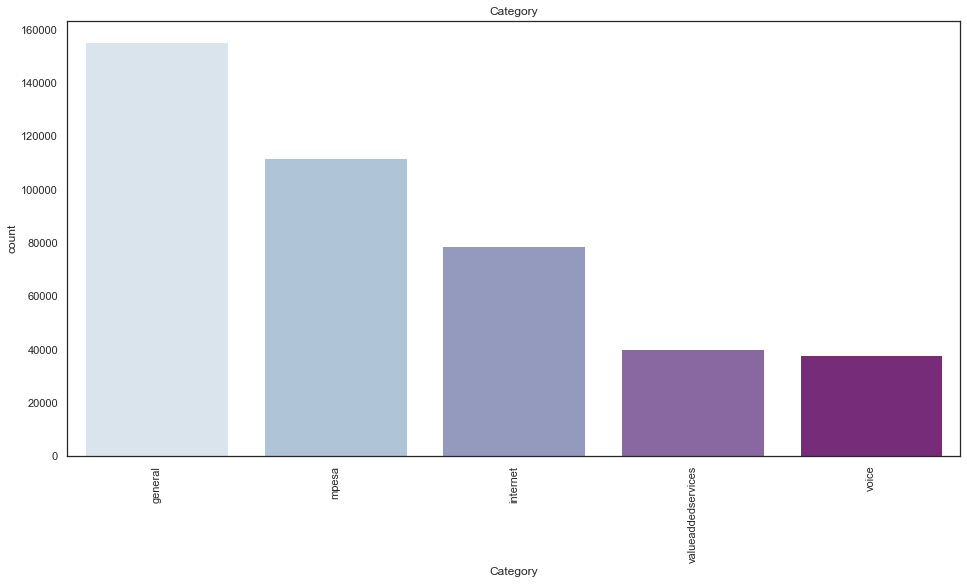

In [143]:
count_plot(df, 'Category')

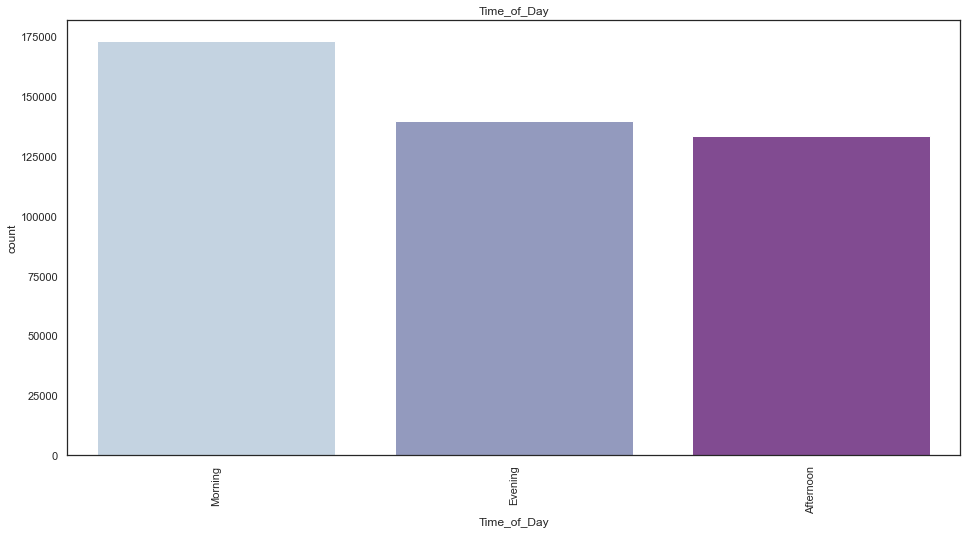

In [144]:
count_plot(df, 'Time_of_Day')

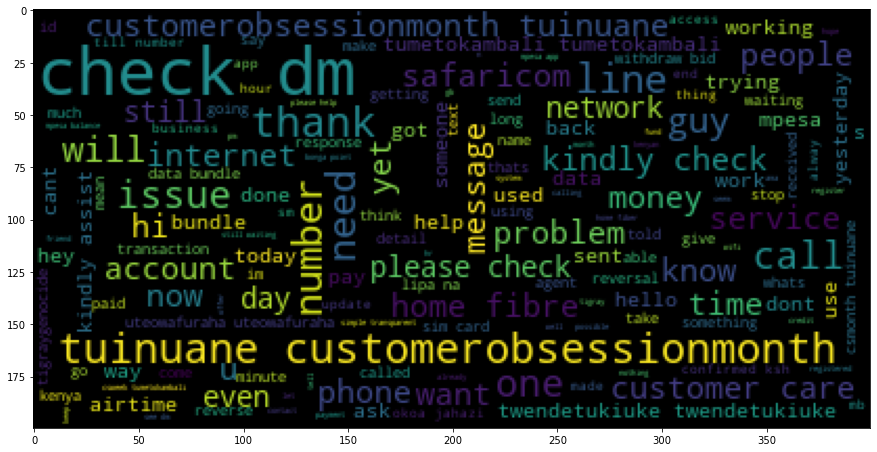

In [114]:
sentences = tweets_df['Clean_Tweets'].tolist()
sentences_ss = " ".join(sentences)

plt.figure(figsize=(15,15))
# plt.imshow(WordCloud(background_color='white',mask=twitter_mask).generate(sentences_ss))
plt.imshow(WordCloud().generate(sentences_ss))

#### 3.2.2 Bivariate Data Analysis

(array([0, 1, 2]),
 [Text(0, 0, 'Evening'), Text(1, 0, 'Afternoon'), Text(2, 0, 'Morning')])

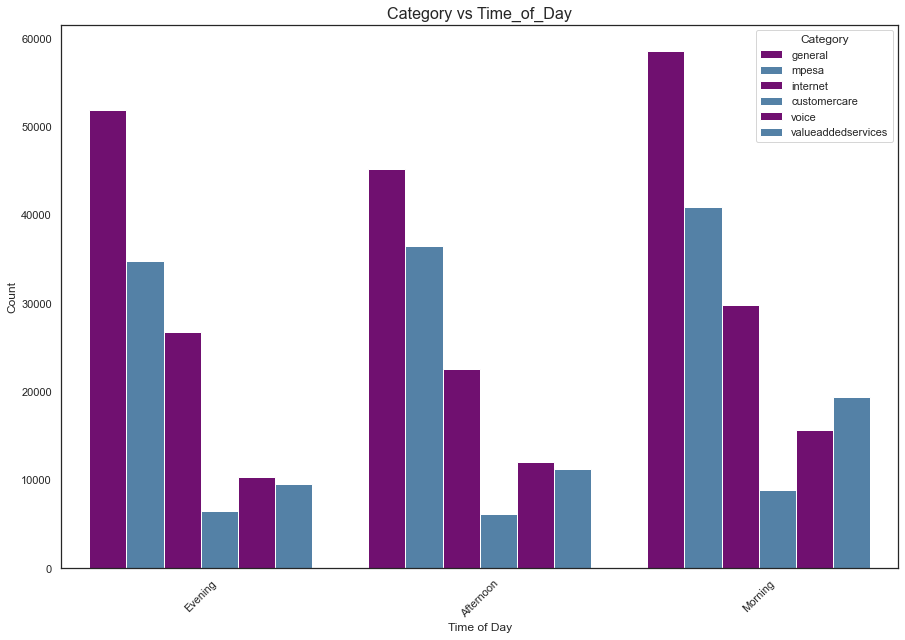

In [129]:
plt.figure(figsize=(15,10))

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.countplot(x='Time_of_Day', hue='Category', data=df,
            palette=['purple', 'steelblue'])

#add overall title
plt.title('Category vs Time_of_Day', fontsize=16)

#add axis titles
plt.xlabel('Time of Day')
plt.ylabel('Count')

#rotate x-axis labels
plt.xticks(rotation=45)

In [290]:
categories = df.groupby('Category')

categories.head()

,Datetime,Clean_Tweets,Category
0,2022-12-14 23:47:00+00:00,ditto,general
2,2022-12-14 23:35:29+00:00,see started clearly show boychild misses fundamental rights country live,general
3,2022-12-14 23:34:57+00:00,demand statement concerning maxine wahome youve sponsored amp involved gbv left asad khan dead silence means youve taken sides perpetrator,mpesa
4,2022-12-14 23:19:59+00:00,th december birthday see something data bundles see inbox mobile number advance,internet
5,2022-12-14 23:00:12+00:00,man dead buggers holding sponsorship maxinewahome asadkhan,general
6,2022-12-14 22:58:45+00:00,kumbe hizi bundles za saf huwa scam thought zingenipush night shift long,internet
7,2022-12-14 22:57:50+00:00,murder,general
8,2022-12-14 22:54:25+00:00,emergency,general
11,2022-12-14 22:11:11+00:00,disappointed poor customer service,customercare
12,2022-12-14 22:08:50+00:00,night bundle reflecting io n pesa yangu mnaiba ivi sue,mpesa


In [291]:
general = categories.get_group('general')

general.head(5)

,Datetime,Clean_Tweets,Category
0,2022-12-14 23:47:00+00:00,ditto,general
2,2022-12-14 23:35:29+00:00,see started clearly show boychild misses fundamental rights country live,general
5,2022-12-14 23:00:12+00:00,man dead buggers holding sponsorship maxinewahome asadkhan,general
7,2022-12-14 22:57:50+00:00,murder,general
8,2022-12-14 22:54:25+00:00,emergency,general


In [292]:
general["Clean_Tweets"] = general.Clean_Tweets.apply(lambda x: x if len(x.split()) > 3 else None)
general = general.dropna()
general

,Datetime,Clean_Tweets,Category
2,2022-12-14 23:35:29+00:00,see started clearly show boychild misses fundamental rights country live,general
5,2022-12-14 23:00:12+00:00,man dead buggers holding sponsorship maxinewahome asadkhan,general
9,2022-12-14 22:49:19+00:00,⁦⁩ ⁦⁩ can’t top new line uaing different number everyone buys scratch cards anymore…you deactivated line guess top reasons,general
15,2022-12-14 22:04:44+00:00,reach taken circles disappointed,general
16,2022-12-14 22:03:58+00:00,confirmed dead read somewhere life support,general
...,...,...,...
999996,2018-10-26 11:00:21+00:00,god knows happened quick responses forget,general
999997,2018-10-26 10:58:57+00:00,saf hamjawai nipromote si mfanye ivyo woiye nadai kupigia watu,general
999998,2018-10-26 10:58:36+00:00,havent received promotion used safaricom yrs,general
999999,2018-10-26 10:58:27+00:00,chenye nishawahi shinda tu njaa,general


In [293]:
freq = pd.Series(' '.join(general.Clean_Tweets).split()).value_counts()[:50]
freq

tumetokambali     14117
safaricom         14079
number             8926
one                6355
line               5921
messages           4960
time               4924
amp                4141
stop               3955
nawekilawakati     3822
day                3578
simple             3483
account            3291
honest             3250
transparent        3210
good               3076
tigraygenocide     2980
tu                 2885
never              2830
back               2804
yet                2780
message            2768
kama               2678
sent               2671
services           2454
send               2425
si                 2419
response           2410
take               2401
new                2369
days               2338
details            2331
getting            2330
used               2302
way                2297
keep               2251
long               2226
see                2203
would              2185
business           2171
go                 2162
mimi            

In [286]:
general.to_csv('general.csv', index=False)